In [2]:
%load_ext autoreload
%autoreload 2

from model import LitModel
from data import LitDataModule
import torch
from torch.utils.data import DataLoader
device = 'cuda' if torch.cuda.is_available() else 'cpu'
import tqdm
import numpy as np

import matplotlib.pyplot as plt

/n/holylabs/LABS/iaifi_lab/Users/creissel/miniforge3/envs/ssm/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
#CHECKPOINT = '/n/home03/creissel/Seismic/runs/test/lightning_logs/73yzmyzc/checkpoints/epoch=47-step=2592.ckpt'
CHECKPOINT = '/n/home03/creissel/Seismic/runs/causal_v2/lightning_logs/bpyc8b8r/checkpoints/epoch=46-step=2585.ckpt'

In [4]:
model = LitModel.load_from_checkpoint(CHECKPOINT)
model = model.to(device)
model = model.eval()
dataset = LitDataModule.load_from_checkpoint(CHECKPOINT)

/n/holylabs/LABS/iaifi_lab/Users/creissel/miniforge3/envs/ssm/lib/python3.10/site-packages/lightning/pytorch/utilities/parsing.py:209: Attribute 'encoder' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['encoder'])`.


In [5]:
pred = []
true = []
with torch.no_grad():
    for inputs, targets in dataset.test_dataloader():
        true.append(targets)
        inputs = inputs.to(device)
        pred.append(model(inputs).detach().cpu().numpy())

/n/holylabs/LABS/iaifi_lab/Users/creissel/miniforge3/envs/ssm/lib/python3.10/site-packages/torch/nn/functional.py:1381: UserWarning: dropout2d: Received a 3D input to dropout2d and assuming that channel-wise 1D dropout behavior is desired - input is interpreted as shape (N, C, L), where C is the channel dim. This behavior will change in a future release to interpret the input as one without a batch dimension, i.e. shape (C, H, W). To maintain the 1D channel-wise dropout behavior, please switch to using dropout1d instead.
  warnings.warn("dropout2d: Received a 3D input to dropout2d and assuming that channel-wise "


In [6]:
pred = np.concatenate(pred).flatten()
true = np.concatenate(true).flatten()

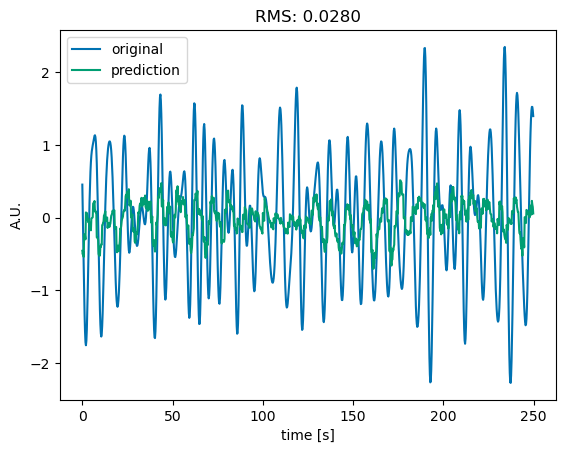

In [7]:
plt.plot(np.arange(0,1000/4.,1/4.), true[:1000], label='original', color='#0072B2')
plt.plot(np.arange(0,1000/4.,1/4.), pred[:1000], label='prediction', color='#009E73')
plt.title('RMS: %.4f' %(np.sqrt(np.mean((pred-true))**2)))
plt.xlabel('time [s]')
plt.ylabel('A.U.')
plt.legend()